In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import os

n_splits = len(list(filter(lambda v: 'batch' in v, os.listdir())))
n_batch = 1

overall_state = []

# Iterate over the generated output files
for n,i in enumerate(["batch"+str(x+1) for x in range(n_splits)]):
    for m,j in enumerate(["_part_"+str(x+1)+".npy" for x in range(n_batch)]):
        # Since the first element in the series was the last output, we remove them
        if n>0 and m>0:
            overall_state.append(np.load(i+j)[1:,:120])
        else:
            overall_state.append(np.load(i+j)[:,:120])
        print(i+j)

# Concatenate all the matrix to get a single state matrix
overall_state = np.concatenate(overall_state)

print("Concatenated")

batch1_part_1.npy
batch2_part_1.npy
batch3_part_1.npy
batch4_part_1.npy
Concatenated


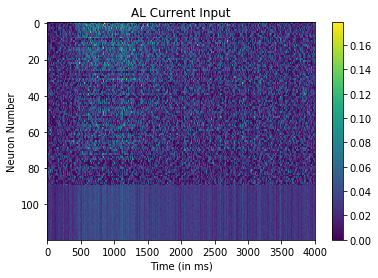

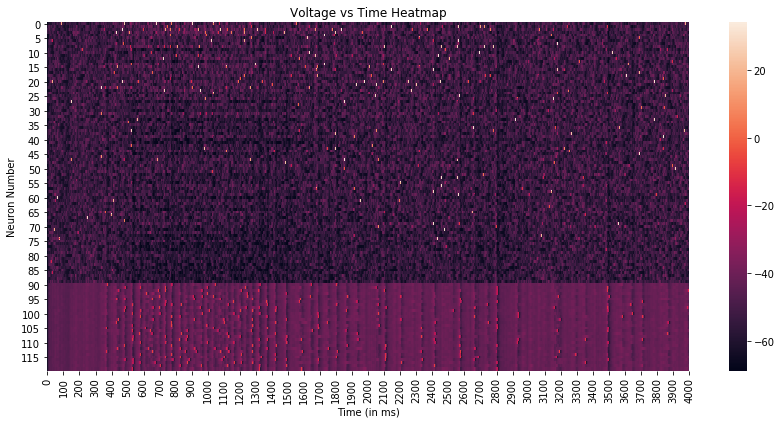

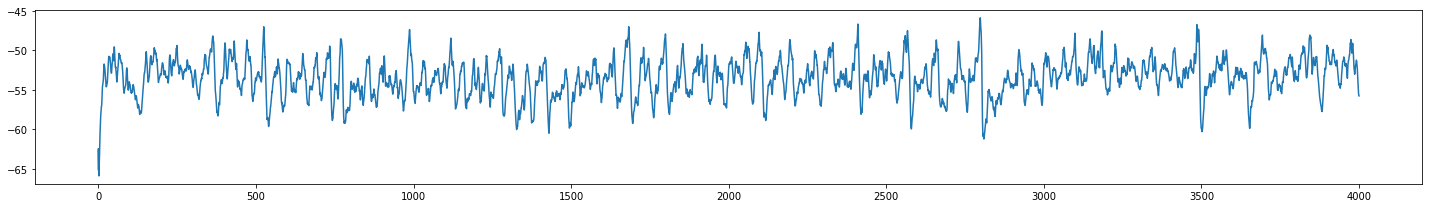

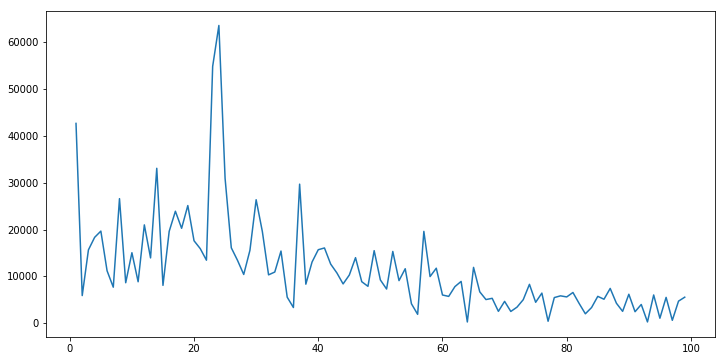

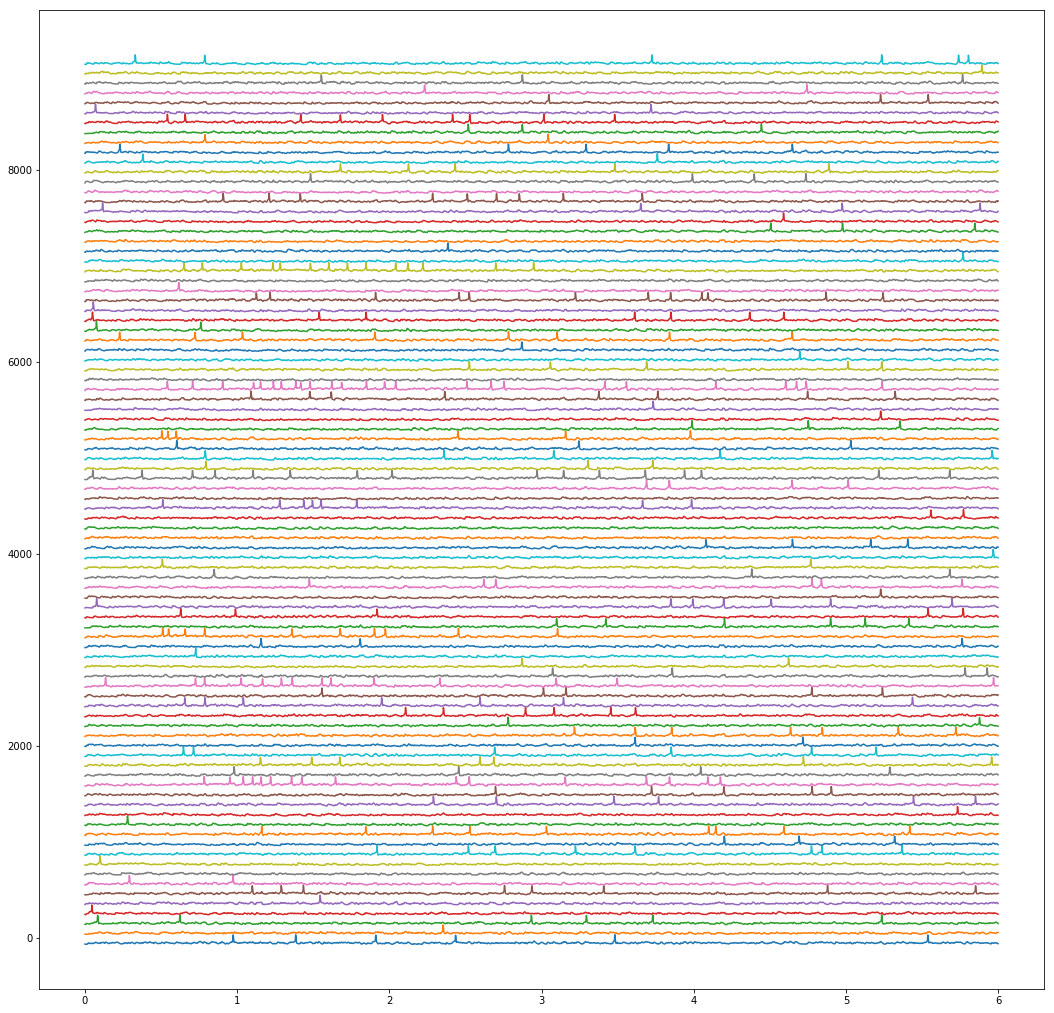

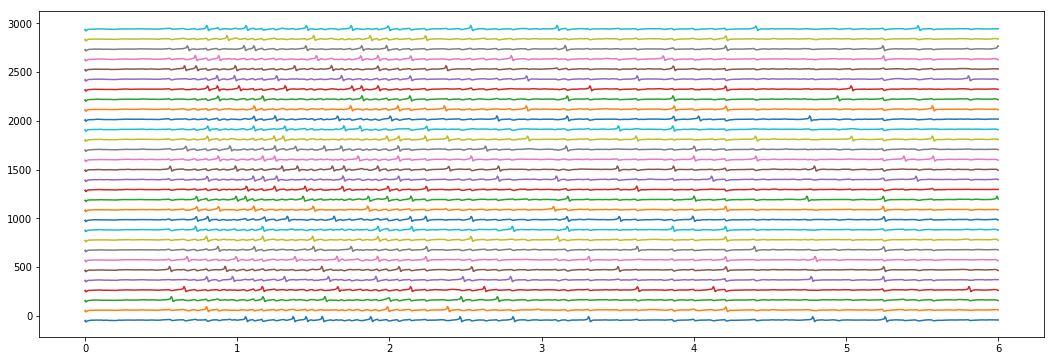

In [2]:
current_input = np.load("current_input.npy")

orderPN = np.argsort(current_input[:90,:].max(axis=1))[::-1]
orderLN = 90+np.argsort(current_input[90:120,:].max(axis=1))[::-1]

order = np.concatenate((orderPN,orderLN),axis=None)

plt.figure()
plt.imshow(current_input[order,::100], aspect='auto')
plt.colorbar()
plt.xlabel('Time (in ms)')
plt.ylabel('Neuron Number')
plt.title('AL Current Input')
plt.savefig('current_input.png')

plt.figure(figsize=(12,6))
    
sns.heatmap(overall_state[::100,order].T,xticklabels=100,yticklabels=5)

plt.xlabel("Time (in ms)")
plt.ylabel("Neuron Number")
plt.title("Voltage vs Time Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png")

plt.figure(figsize=(20,3))
plt.plot(np.arange(0,overall_state.shape[0]*0.01,0.01),overall_state[:,:90].mean(axis=1))
plt.tight_layout()
plt.savefig("LFP.png")

y = overall_state[20000:120000,:90].mean(axis=1)
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 0.01/1000)
ind = np.logical_and(freq>0,freq<100)

plt.figure(figsize=(12,6))
plt.plot( freq[ind], np.abs(Y)[ind])
plt.savefig("fourier.png")

plt.figure(figsize=(18,18))
for i in range(int(0.75*overall_state.shape[1])):
    plt.plot(np.linspace(0,6,overall_state[::100,i].shape[0]),i*(overall_state.max()-overall_state.min())+overall_state[::100,i])
plt.savefig("pns.png")

plt.figure(figsize=(18,6))
for i in range(int(0.25*overall_state.shape[1])):
    plt.plot(np.linspace(0,6,overall_state[::100,int(0.75*overall_state.shape[1])+i].shape[0]),i*(overall_state.max()-overall_state.min())+overall_state[::100,int(0.75*overall_state.shape[1])+i])
plt.savefig("lns.png")

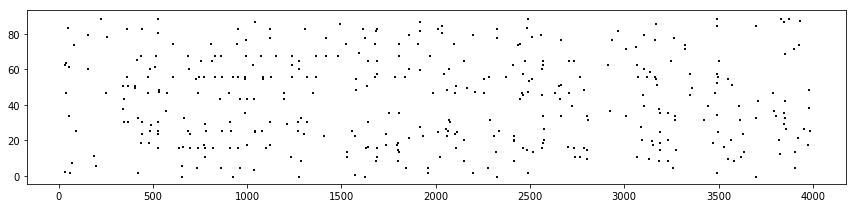

In [3]:
plt.figure(figsize=(12,3))
temp = overall_state.T[:90,::100]
lol = np.logical_and(temp[:,1:]>0,temp[:,:-1]<0)
events = []
for i in range(90):
    for j in range(4000):
        if lol[i,j]:
            events.append((i,j))
events = np.array(events)
plt.scatter(events[:,1],events[:,0],marker='s',s=1.0,c='k')
plt.tight_layout()
plt.savefig('Raster_PNs.png')

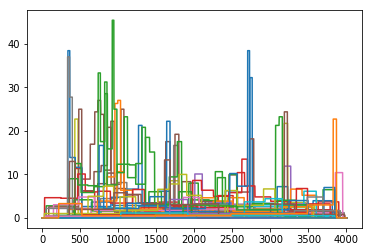

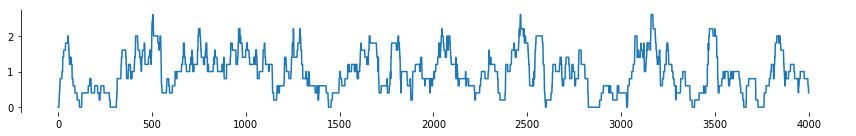

In [28]:
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
plt.plot(np.convolve(lol.sum(axis=0), np.ones((50,))/50, mode='same')/0.1)
plt.tight_layout()
plt.savefig('FR.png')

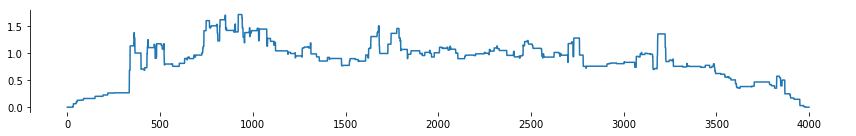

In [27]:
fr = np.zeros(lol.shape)
for i in np.unique(events[:,0]):
    times = events[events[:,0]==i][:,1]
    frs= 1000/np.diff(events[events[:,0]==i][:,1])
    for n in range(1,times.shape[0]):
        fr[i,times[n-1]:times[n]]=frs[n-1]
        
plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
ax.spines['bottom'].set_visible(False)
#plt.xticks([])
plt.plot(fr.mean(axis=0))
plt.tight_layout()
plt.savefig('FR.png')

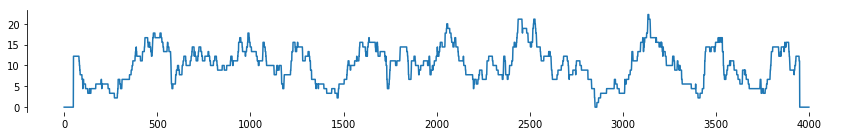

In [20]:
def runningResponsive(x,N):
    y = np.zeros(x.shape[1])
    for ctr in range(int(N/2),x.shape[1]-int(N/2)):
         y[ctr] = (np.sum(x[:,ctr-int(N/2):ctr+int(N/2)],axis=1)>0).mean()
    return y

plt.figure(figsize=(12,2))
ax = plt.subplot(111)   
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
ax.spines['bottom'].set_visible(False)
plt.plot(runningResponsive(lol,100)*100)
plt.tight_layout()
plt.savefig('Res.png')

np.save("AL_output",overall_state[::100,:])